# 패키지 설치

In [2]:
!git clone https://github.com/ultralytics/ultralytics.git

'ultralytics'에 복제합니다...
remote: Enumerating objects: 4482, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 4482 (delta 41), reused 68 (delta 21), pack-reused 4365
오브젝트를 받는 중: 100% (4482/4482), 4.02 MiB | 1.86 MiB/s, 완료.
델타를 알아내는 중: 100% (2918/2918), 완료.


# 경로 설정

In [10]:
%cd /Users/i/Desktop/object-detection/ultralytics

/Users/i/Desktop/object-detection/ultralytics


# 환경 설정

In [11]:
!pip install -r requirements.txt

In [12]:
!pip install ultralytics

# 현재 경로 확인

In [13]:
pwd

'/Users/i/Desktop/object-detection/ultralytics'

# 이미지 파일경로 텍스트 파일에 넣기

In [14]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('./ultralytics/yolo/data/data/train/images/*.jpg') + glob('./ultralytics/yolo/data/data/train/images/*.jpeg')
valid_img_list = glob('./ultralytics/yolo/data/data/valid/images/*.jpg') + glob('./ultralytics/yolo/data/data/valid/images/*.jpeg')


# txt 파일에 write
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

# 모델 정의

In [19]:
from ultralytics import YOLO
 
model = YOLO("yolov8x.pt")  # load a pretrained YOLOv8n model

# 모델 훈련

In [ ]:
model.train(data="data.yaml")  # train the model

Ultralytics YOLOv8.0.33 🚀 Python-3.9.13 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, works


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/100         0G      1.044      1.553      1.321        224        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          8         79      0.542      0.139      0.152      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/100         0G     0.9678      1.415      1.268        146        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          8         79      0.479      0.113      0.109     0.0816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/100         0G     0.9719      1.536      1.292        294        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          8         79      0.528      0.198      0.179      0.145

      Epo

# 모델 평가

In [25]:
model.val()  

Ultralytics YOLOv8.0.33 🚀 Python-3.9.13 torch-1.13.1 CPU
Model summary (fused): 168 layers, 3008768 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /Users/i/Desktop/object-detection/ultralytics/ultralytics/yolo/dat
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 684, len(boxes) = 690. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         93        690      0.908      0.801       0.92      0.808
   Instant Noodle Cups         93         15      0.972          1      0.995      0.917
         aluminum foil         93         21      0.863          1      0.995      0.903
                   can         93         15      0.933          1      0.995      0.886
          glass bottle         93         15      0.924      0.817      0.

- 13개 라벨 중 총 `5개 라벨(알루미늄 호일, 패트병, 비닐봉지, 플라스틱 숫가락, 나무젓가락)`에 대한 학습이 부족하다. 

=> 관련 데이터 보충, 하이퍼 파라미터 튜닝 필요해보임

# 모델 예측

In [44]:
import cv2
im1=cv2.imread("/Users/i/Desktop/object-detection/ultralytics/ultralytics/yolo/data/data/test/images/53_jpg.rf.cacbb75f33c47b7011b1e3ac3d9216d7.jpg")
result=model.predict(source=im1, save=True, save_txt=True) 


0: 640x640 3 plastic-bags, 11 plastic-bowls, 1 trash, 92.6ms
Speed: 1.2ms pre-process, 92.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /Users/i/Desktop/object-detection/ultralytics/runs/detect/predict
1 label saved to /Users/i/Desktop/object-detection/ultralytics/runs/detect/predict/labels


# 시각화

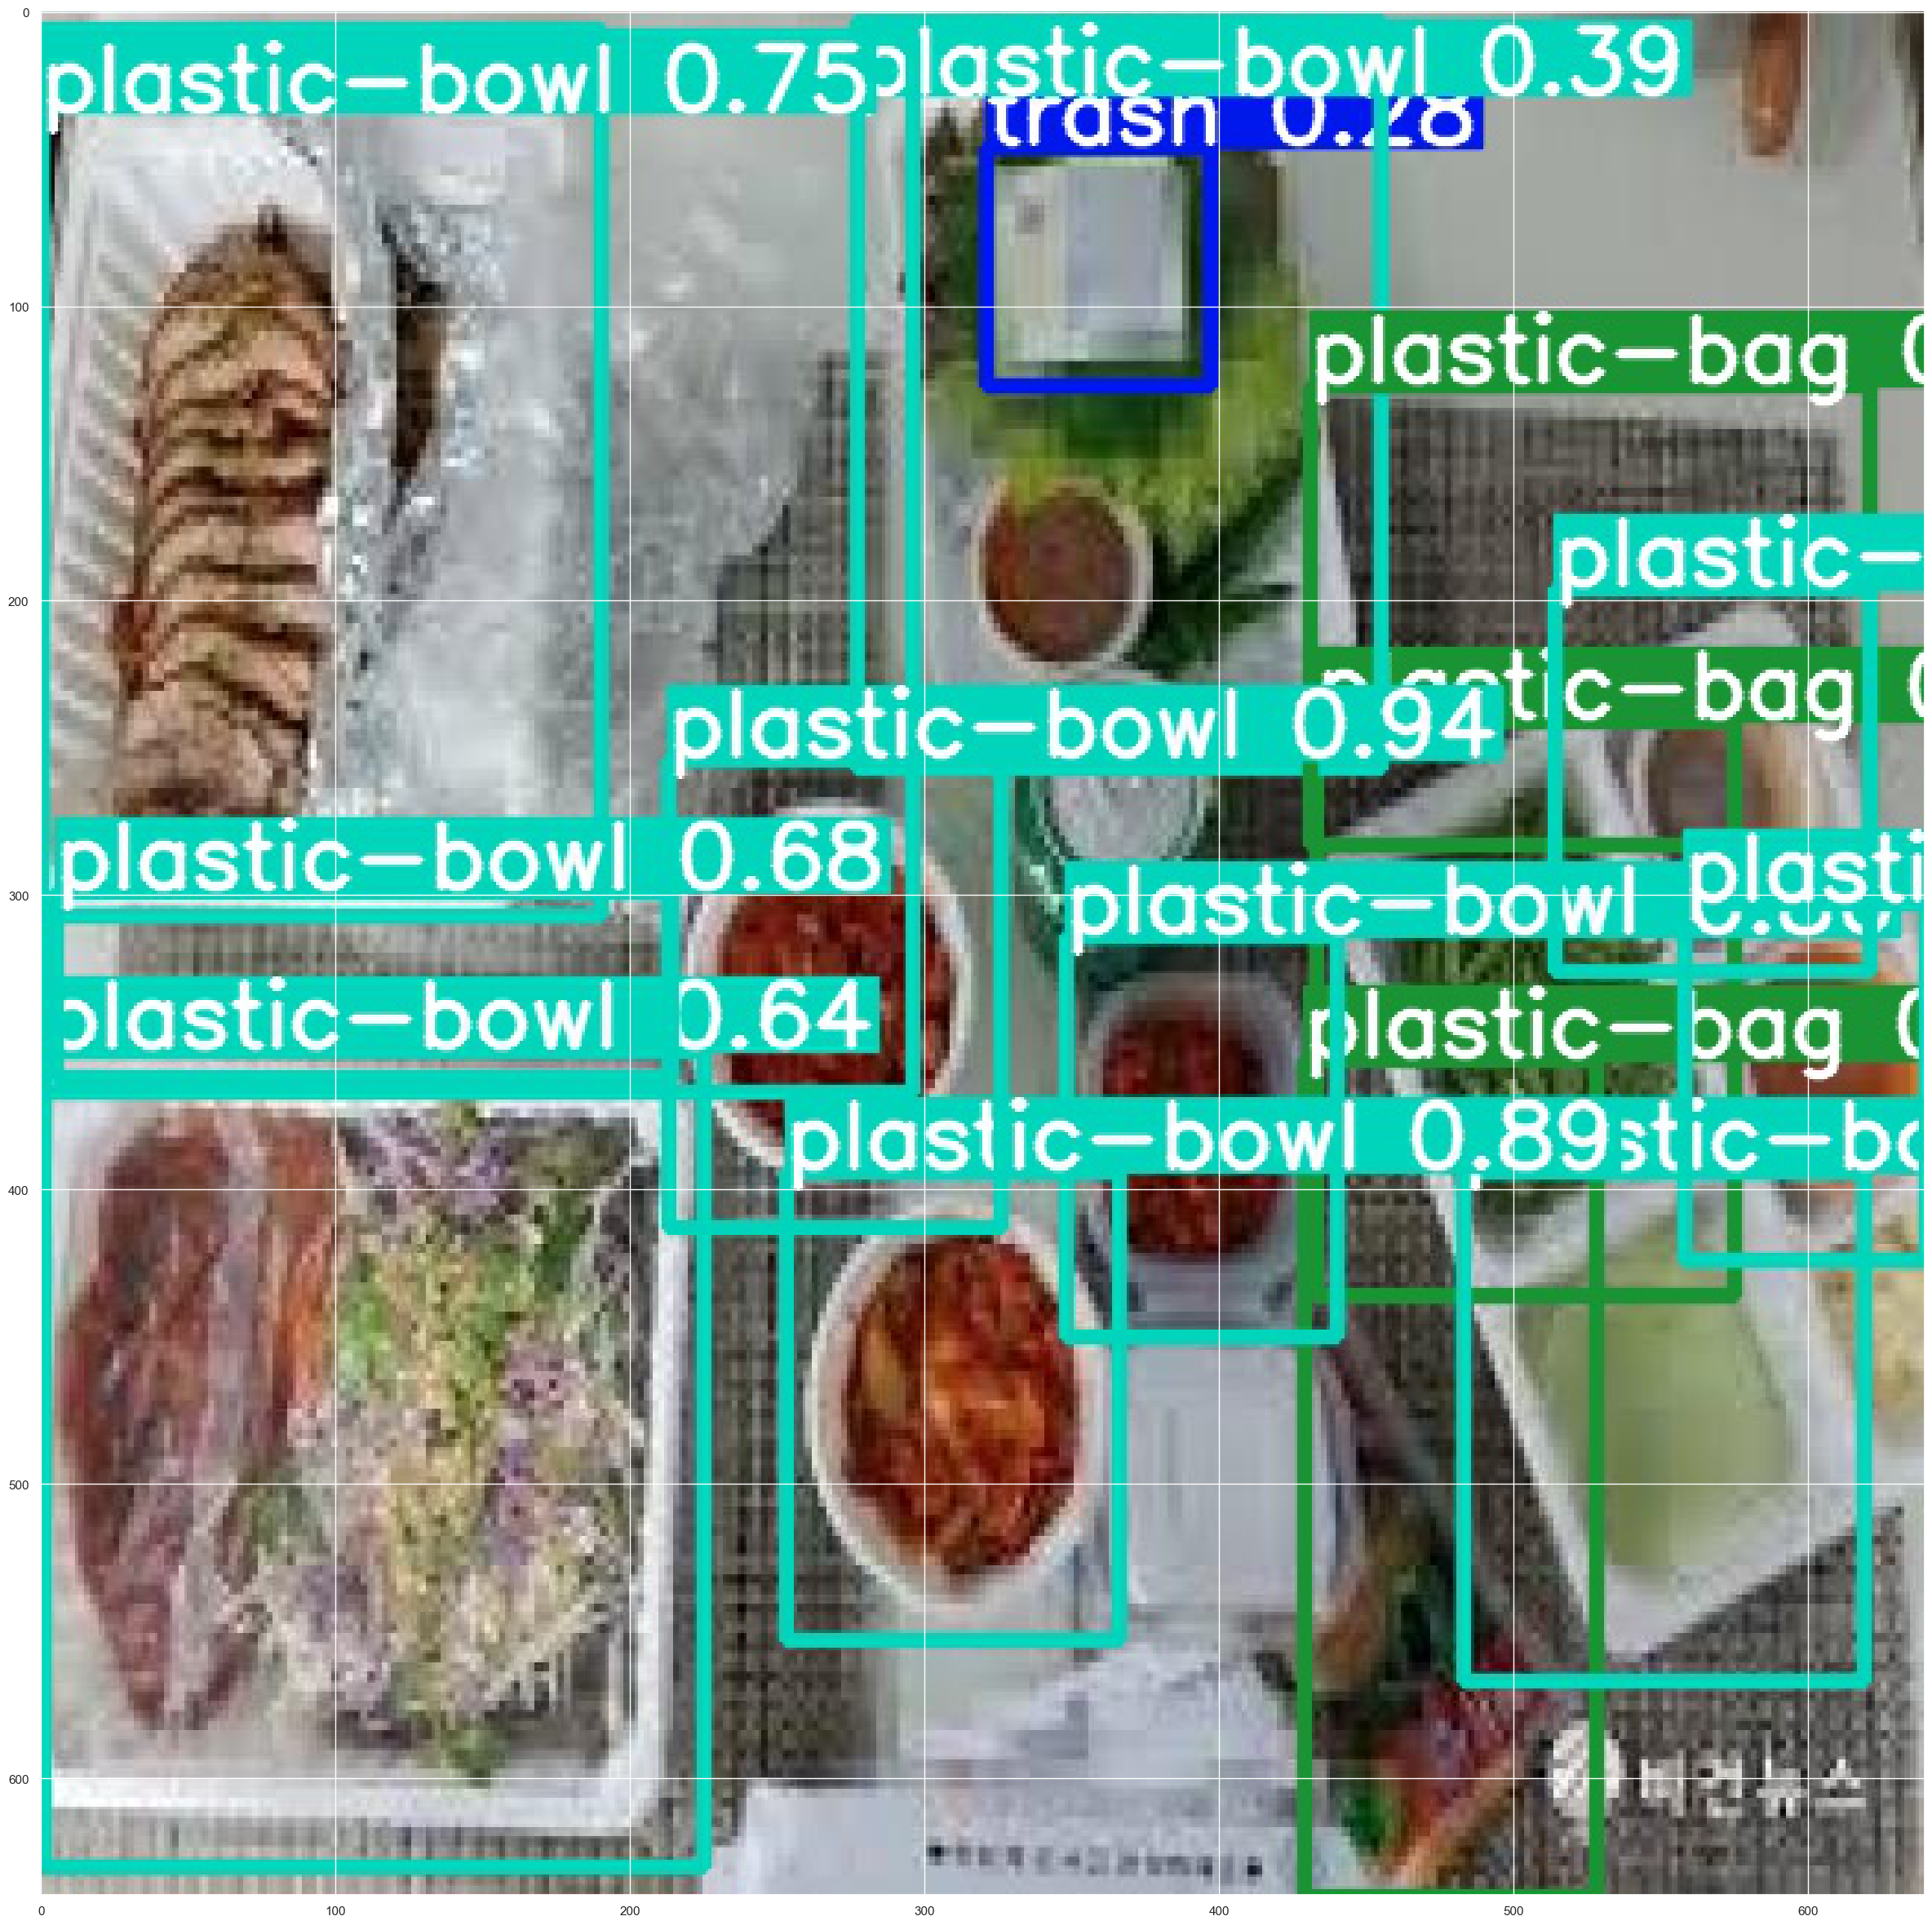

In [45]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
path = '/Users/i/Desktop/object-detection/ultralytics/runs/detect/predict/image0.jpg' 
image = Image.open(path)
img = np.array(image)
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.show()